__Uber Rides Data Analysis using Python__

In [271]:
# Importing all the neccessary libraries ie pandas,numpy,matplolit and seaborn.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing the uber rides data using the csv file below.
dataset = pd.read_csv("Downloads/UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [273]:
#We use shape to know how many rows and columns our csv file possess.
dataset.shape

(1156, 7)

In [275]:
#To understand more deeply about our dataset.We use the .info() function .
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [277]:
#From the above information we have gathered that the PURPOSE row
#has null values and i have decided to replace
#it with Not using the fillna function.
dataset["PURPOSE"].fillna("NOT")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [281]:
#Changing the Start_date and End_date to date_time formate so that further it 
#can be used for analysis.
dataset["START_DATE"] = pd.to_datetime(dataset["START_DATE"],errors="coerce")
dataset["END_DATE"] = pd.to_datetime(dataset["END_DATE"],errors="coerce")
#Importing the datatime Module
from datetime import datetime
dataset["date"] = pd.DatetimeIndex(dataset["START_DATE"]).date
dataset["time"] = pd.DatetimeIndex(dataset["START_DATE"]).hour

#changing into categories of day and night
dataset["day-night"] = pd.cut(dataset["time"],bins=[0,10,15,19,24],
                              labels=["Morning","Afternoon",
                                 "Evening","Night"])
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [149]:
#Deleting rows with null values
dataset.dropna()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening


In [195]:
#Let’s start with checking the unique values in dataset of the columns 
#with object datatype.
obj = dataset.dtypes=="object"
obj_columns = list(obj[obj].index)
unique_values = {}
for col in obj_columns:
    unique_values[col]= dataset[col].unique().size
unique_values    

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

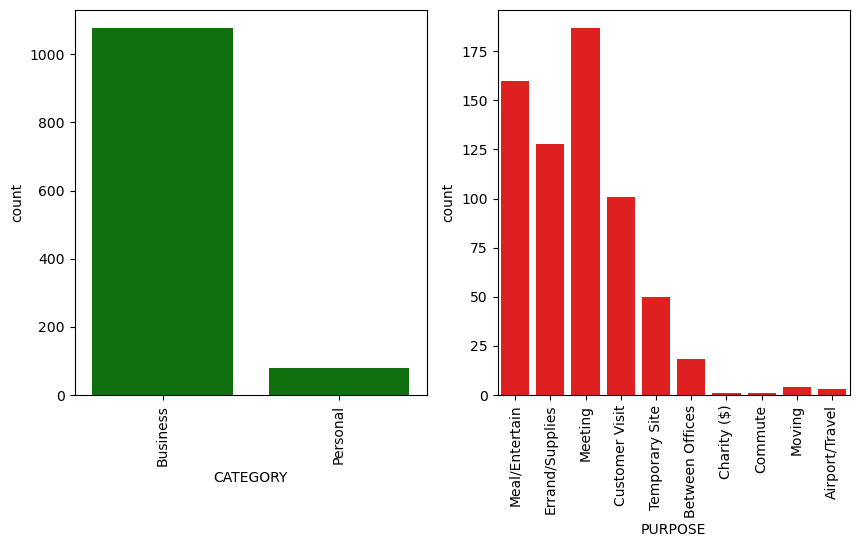

In [287]:
#Now, we will be using matplotlib and seaborn
#library for countplot the CATEGORY and PURPOSE columns.
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x =dataset["CATEGORY"],color="green")
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x=dataset["PURPOSE"],color="red")
plt.xticks(rotation = 90)
plt.show()

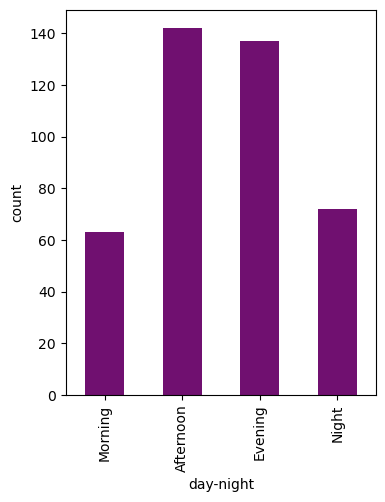

In [333]:
# Let's now deep into visualising the day-nigt
plt.figure(figsize=(4,5))
sns.countplot(x = dataset['day-night'],width=0.5,color="purple")
plt.xticks(rotation = 90)
plt.show()

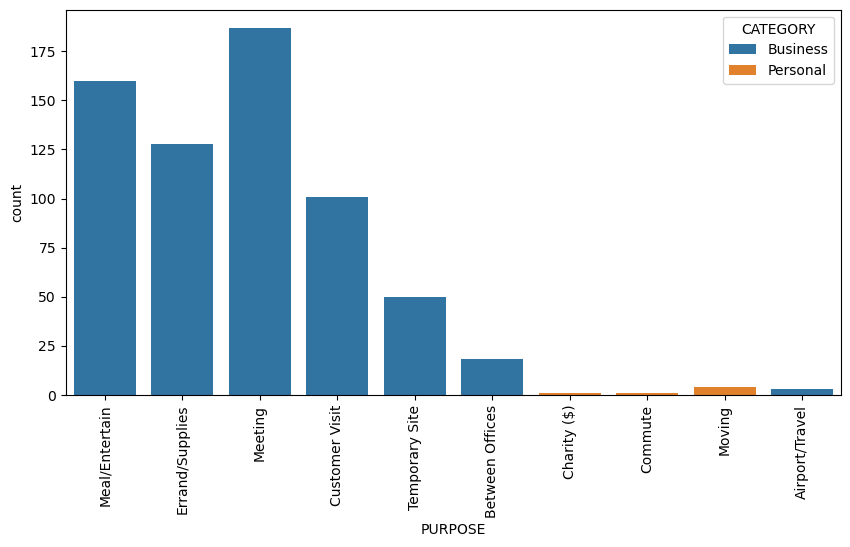

In [353]:
#Lets compare the two differeng categories alond with the purpose of the user
plt.figure(figsize=(10,5))
sns.countplot(data= dataset,x=dataset["PURPOSE"],hue=dataset["CATEGORY"])
plt.xticks(rotation=90)
plt.show()